In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from implementations import *
from losses import *
from EDA import *
from cross_validation import *
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [30]:
DATA_TRAIN_PATH = "../data/train.csv"
data_y, data_set, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=True)

In [31]:
# Fixing the seed
seed = 8

### Split and classify data

In [32]:
# Classification of the output
y_0, y_1, y_2, y_3 = y_classification(data_y, data_set)

In [33]:
#EDA for each class
class_0, class_1, class_2, class_3 = EDA_class(data_set)

In [34]:
# Set the "spliter" value correponding to the part dedicated for train
spliter = 0.8

# Split into a train and a test set
train_0, y_tr_0, test_0, y_te_0 = train_test_separator(y_0, class_0)
train_1, y_tr_1, test_1, y_te_1 = train_test_separator(y_1, class_1)
train_2, y_tr_2, test_2, y_te_2 = train_test_separator(y_2, class_2)
train_3, y_tr_3, test_3, y_te_3 = train_test_separator(y_3, class_3)

# Tutrial for cross validation

***

In [35]:
# Create a "paramters" object
param = Parameters()

# Set up some parameters such as 'max_iter', 'gamma', etc...
param.set_max_iter(100)
param.set_mini_batch_size(100)
param.set_gamma(1e-1) # useless for the cross-validation but it's an example

# Define the method and the loss function you want
param.set_method(least_squares_SGD)
mse = MSE()
param.set_loss_fct(mse)

# Select the parameter you want to test ('gamma' or 'lambda' or both)
param.set_to_test(['gamma'])

# Define the range of your parameter that will be test
param.set_gamma_range(np.logspace(-6,0,30))

# Tell if you want visualization of your result or not
param.set_viz(True)

# Select the class of your data set: 0, 1, 2 or 3
class_ind = 0

Test error: 15.869017632241814
Best gamma: 0.6210169418915616


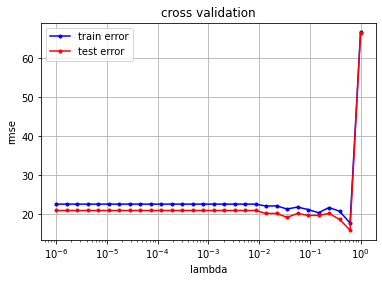

In [37]:
opt_param = test_function(data_y, data_set, param, class_ind)

In [26]:
opt_param.gamma

0.0452035365636025

# See some histograms

***

#### Only on class 0

In [ ]:
classs = class_0
yy = y_0

In [ ]:
ind_y_neg = np.array(np.where(yy == 0)[0])
ind_y_pos = np.array(np.where(yy == 1)[0])

In [ ]:
for col in range(16):
    plt.figure(figsize=(8,5))
    plt.hist(classs[ind_y_neg, col], bins=100, histtype = 'step', color = 'red', density=True)
    plt.hist(classs[ind_y_pos, col], bins=100, histtype = 'step', density=True)
    plt.title('Histogram of feature 0')
    plt.show()

***
***

# Submission example

In [ ]:
param = Parameters()

In [ ]:
# Train our model and get the response weight and its loss
param.set_init_w(np.zeros(class_0.shape[1]))
mse_0, w_0 = param.method(y_0, class_0, param)

In [ ]:
# Train our model and get the response weight and its loss
param.set_init_w(np.zeros(class_1.shape[1]))
mse_1, w_1 = param.method(y_1, class_1, param)

In [ ]:
# Train our model and get the response weight and its loss
param.set_init_w(np.zeros(class_2.shape[1]))
mse_2, w_2 = param.method(y_2, class_2, param)

In [ ]:
# Train our model and get the response weight and its loss
param.set_init_w(np.zeros(class_3.shape[1]))
mse_3, w_3 = param.method(y_3, class_3, param)

In [ ]:
print(w_0.shape)
print(class_0.shape)

In [ ]:
# Get the predictions on the train set
y_pred_0 = predict_labels(w_0, class_0)
y_pred_1 = predict_labels(w_1, class_1)
y_pred_2 = predict_labels(w_2, class_2)
y_pred_3 = predict_labels(w_3, class_3)

In [ ]:
y_pred_train = rebuild_y(y_pred_0, y_pred_1, y_pred_2, y_pred_3, data_set)
counting_errors(y_pred_train, data_y)

In [ ]:
DATA_TEST_PATH = "../data/test.csv"
_, data_test_set, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
# EDA for each class
class_0, class_1, class_2, class_3 = EDA_class(data_test_set)

# Get the predictions on the train set
y_pred_0 = predict_labels(w_0, class_0)
y_pred_1 = predict_labels(w_1, class_1)
y_pred_2 = predict_labels(w_2, class_2)
y_pred_3 = predict_labels(w_3, class_3)

y_pred = rebuild_y(y_pred_0, y_pred_1, y_pred_2, y_pred_3, data_test_set)

In [ ]:
OUTPUT_PATH = '../data/test_prediction_submission.csv' # TODO: fill in desired name of output file for submission
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)